Connected to venv (Python 3.12.3)

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install scikit-learn
import sklearn as sk

In [37]:
asma = pd.read_csv('./normalizado/asma-normalizado.csv',sep=';')
estacoes = pd.read_csv('./normalizado/estacoes-normalizado.csv',sep=';')
influenza = pd.read_csv('./normalizado/influenza-normalizado.csv',sep=';')
municipios = pd.read_csv('./normalizado/municipios-normalizado.csv',sep=';')
intoxicacoes = pd.read_csv('./normalizado/intoxicacoes-normalizado.csv',sep=';')
pneumo = pd.read_csv('./normalizado/pneumoconioses-normalizado.csv',sep=';')
populacao = pd.read_csv('./normalizado/populacao-normalizado.csv',sep=';')
meningite = pd.read_csv('./normalizado/meningite-normalizado.csv',sep=';')

In [38]:
qualidade_ar = pd.read_csv('./normalizado/qualidade_ar-parcialmente_normalizado.csv',sep=';')

Os 3 blocos de código acima simplesmente transformam cada um dos csv's acima para dataframes do pandas, que são como tabelas de SQL, usando o ';' em cada um dos csv's para separar por colunas. Além disso acima desse código são importadas as bibliotecas necessárias para fazer o tratamento e a análise de dados. 

In [39]:
qualidade_ar 

,NOME_MUNIC,UF,NOME_ESTACAO,ITEM_MONITORADO,SIGLA,CONCENTRACAO,IQAR,DATA,HORA,SITUACAO
0,CAMAÇARI,BA,CÂMARA,DIÓXIDO DE ENXOFRE,SO2,891,3400.0,22/11/2022,11:00,VA
1,CAMAÇARI,BA,CÂMARA,DIÓXIDO DE NITROGÊNIO,NO2,5670,5120.0,22/11/2022,11:00,VA
2,CAMAÇARI,BA,CÂMARA,DIREÇÃO DO VENTO,DV,116732,NaN,22/11/2022,11:00,VA
3,CAMAÇARI,BA,CÂMARA,ÓXIDO NÍTRICO,NO,6156,NaN,22/11/2022,11:00,VA
4,CAMAÇARI,BA,CÂMARA,ÓXIDOS DE NITROGÊNIO,NOX,11846,NaN,22/11/2022,11:00,VA
...,...,...,...,...,...,...,...,...,...,...
838845,RIO DE JANEIRO,RJ,TIJUCA,UMIDADE RELATIVA,UR,84730,NaN,01/07/2022,00:00,VA
838846,RIO DE JANEIRO,RJ,TIJUCA,VENTO,VV,60,NaN,01/07/2022,00:00,VA
838847,TRIUNFO,RS,TRIUNFO/POLO PETROQUÍMICO/MÓVEL,DIÓXIDO DE ENXOFRE,SO2,860,2000.0,01/07/2022,00:00,VA
838848,TRIUNFO,RS,TRIUNFO/POLO PETROQUÍMICO/MÓVEL,DIÓXIDO DE NITROGÊNIO,NO2,9720,2000.0,01/07/2022,00:00,VA


In [40]:
municipios

,COD_MUNIC,NOME DO MUNICÍPIO
0,110001,ALTA FLORESTA D'OESTE
1,110002,ARIQUEMES
2,110003,CABIXI
3,110004,CACOAL
4,110005,CEREJEIRAS
...,...,...
5565,522200,VIANÓPOLIS
5566,522205,VICENTINÓPOLIS
5567,522220,VILA BOA
5568,522230,VILA PROPÍCIO


A primeira tarefa que vou fazer é juntar as tabelas de município e qualidade do ar, para que possamos mais tarde mapear cada código municipal à sua respectiva população, de forma que possamos estudar como a população de uma cidade impacta a qualidade do ar. Mais tarde, outras análises serão feitas, mas por enquanto essa manipulação de dataframes é tudo o que é necessário.

In [41]:
qualidade_ar = qualidade_ar.drop_duplicates()
municipios = municipios.drop_duplicates()

Código acima serve simplesmente para remover linhas totalmente duplicadas para garantir a consistência do dataframe.

In [48]:

teste = pd.merge(qualidade_ar, municipios, how ='left', left_on='NOME_MUNIC',right_on='NOME DO MUNICÍPIO')

In [49]:
teste

,NOME_MUNIC,UF,NOME_ESTACAO,ITEM_MONITORADO,SIGLA,CONCENTRACAO,IQAR,DATA,HORA,SITUACAO,COD_MUNIC,NOME DO MUNICÍPIO
0,CAMAÇARI,BA,CÂMARA,DIÓXIDO DE ENXOFRE,SO2,891,3400.0,22/11/2022,11:00,VA,290570,CAMAÇARI
1,CAMAÇARI,BA,CÂMARA,DIÓXIDO DE NITROGÊNIO,NO2,5670,5120.0,22/11/2022,11:00,VA,290570,CAMAÇARI
2,CAMAÇARI,BA,CÂMARA,DIREÇÃO DO VENTO,DV,116732,NaN,22/11/2022,11:00,VA,290570,CAMAÇARI
3,CAMAÇARI,BA,CÂMARA,ÓXIDO NÍTRICO,NO,6156,NaN,22/11/2022,11:00,VA,290570,CAMAÇARI
4,CAMAÇARI,BA,CÂMARA,ÓXIDOS DE NITROGÊNIO,NOX,11846,NaN,22/11/2022,11:00,VA,290570,CAMAÇARI
...,...,...,...,...,...,...,...,...,...,...,...,...
863806,TRIUNFO,RS,TRIUNFO/POLO PETROQUÍMICO/MÓVEL,DIÓXIDO DE NITROGÊNIO,NO2,9720,2000.0,01/07/2022,00:00,VA,261570,TRIUNFO
863807,TRIUNFO,RS,TRIUNFO/POLO PETROQUÍMICO/MÓVEL,DIÓXIDO DE NITROGÊNIO,NO2,9720,2000.0,01/07/2022,00:00,VA,432200,TRIUNFO
863808,TRIUNFO,RS,TRIUNFO/POLO PETROQUÍMICO/MÓVEL,MONÓXIDO DE CARBONO,CO,20,0.0,01/07/2022,00:00,VA,251680,TRIUNFO
863809,TRIUNFO,RS,TRIUNFO/POLO PETROQUÍMICO/MÓVEL,MONÓXIDO DE CARBONO,CO,20,0.0,01/07/2022,00:00,VA,261570,TRIUNFO


Como podemos ver, ao usar o left join, o número de linhas do dataframe aumenta. Isso significa que existe algum dado duplicado em algum dos dois dataframes, vamos verificar qual é.

In [51]:
municipios['NOME DO MUNICÍPIO'].value_counts()

NOME DO MUNICÍPIO
BOM JESUS               5
SÃO DOMINGOS            5
BONITO                  4
SANTA HELENA            4
SANTA TEREZINHA         4
                       ..
CONCEIÇÃO DO JACUÍPE    1
CONCEIÇÃO DO COITÉ      1
CONCEIÇÃO DO ALMEIDA    1
CONCEIÇÃO DA FEIRA      1
BRASÍLIA                1
Name: count, Length: 5297, dtype: int64

In [52]:
municipios[municipios['NOME DO MUNICÍPIO']=='BOM JESUS']

,COD_MUNIC,NOME DO MUNICÍPIO
697,220190,BOM JESUS
1093,240170,BOM JESUS
1273,250220,BOM JESUS
4351,420253,BOM JESUS
4654,430230,BOM JESUS


Como visto acima, existem muitas cidades que estão duplicadas, pois existem múltiplos municípios com nomes diferentes em diferentes estados. Por isso, uma nova coluna de estado será adicionada no dataframe de município, usando os 2 primeiros digitos do código, para que o join possa ser feito usando tanto o estado quanto a cidade, de forma a garantir que a cidade indicada seja a correta.

In [59]:
# Dicionário que mapeia os códigos dos estados conforme o IBGE para as siglas dos estados
codigo_estado_ibge = {
    '11': 'RO',
    '12': 'AC',
    '13': 'AM',
    '14': 'RR',
    '15': 'PA',
    '16': 'AP',
    '17': 'TO',
    '21': 'MA',
    '22': 'PI',
    '23': 'CE',
    '24': 'RN',
    '25': 'PB',
    '26': 'PE',
    '27': 'AL',
    '28': 'SE',
    '29': 'BA',
    '31': 'MG',
    '32': 'ES',
    '33': 'RJ',
    '35': 'SP',
    '41': 'PR',
    '42': 'SC',
    '43': 'RS',
    '50': 'MS',
    '51': 'MT',
    '52': 'GO',
    '53': 'DF'
}

In [61]:
# Função para extrair a sigla do estado a partir do código do município
def get_uf_from_codigo(codigo):
    estado_codigo = str(codigo)[:2]  # Extrair os dois primeiros dígitos como string
    return codigo_estado_ibge.get(estado_codigo, 'Código não encontrado')

# Criar a nova coluna 'UF' no dataframe
municipios['UF'] = municipios['COD_MUNIC'].apply(lambda x: get_uf_from_codigo(x))


In [62]:
municipios

,COD_MUNIC,NOME DO MUNICÍPIO,UF
0,110001,ALTA FLORESTA D'OESTE,RO
1,110002,ARIQUEMES,RO
2,110003,CABIXI,RO
3,110004,CACOAL,RO
4,110005,CEREJEIRAS,RO
...,...,...,...
5565,522200,VIANÓPOLIS,GO
5566,522205,VICENTINÓPOLIS,GO
5567,522220,VILA BOA,GO
5568,522230,VILA PROPÍCIO,GO


Dessa forma conseguimos garantir que, quando fizermos o join, o código certo será mapeado para a cidade certa. Agora, basta testar se o mapeamento está certo. Podemos fazer isso verificando se o número de municípios por estado corresponde ao da vida real.

In [64]:
municipios['UF'].value_counts()

UF
MG    853
SP    645
RS    497
BA    417
PR    399
SC    295
GO    246
PI    224
PB    223
MA    217
PE    185
CE    184
RN    167
PA    144
MT    141
TO    139
AL    102
RJ     92
MS     79
ES     78
SE     75
AM     62
RO     52
AC     22
AP     16
RR     15
DF      1
Name: count, dtype: int64

Esses dados conferem com o número oficial de municípios registrados por estado em 2021, demonstrando que a função funcionou corretamente, e cada cidade está mapeada para o seu respectivo estado. Agora basta unir as duas tabelas.

In [66]:
pd.merge(qualidade_ar,municipios, left_on=['NOME_MUNIC','UF'], right_on=['NOME DO MUNICÍPIO','UF'], how='inner')

,NOME_MUNIC,UF,NOME_ESTACAO,ITEM_MONITORADO,SIGLA,CONCENTRACAO,IQAR,DATA,HORA,SITUACAO,COD_MUNIC,NOME DO MUNICÍPIO
0,CAMAÇARI,BA,CÂMARA,DIÓXIDO DE ENXOFRE,SO2,891,3400.0,22/11/2022,11:00,VA,290570,CAMAÇARI
1,CAMAÇARI,BA,CÂMARA,DIÓXIDO DE NITROGÊNIO,NO2,5670,5120.0,22/11/2022,11:00,VA,290570,CAMAÇARI
2,CAMAÇARI,BA,CÂMARA,DIREÇÃO DO VENTO,DV,116732,NaN,22/11/2022,11:00,VA,290570,CAMAÇARI
3,CAMAÇARI,BA,CÂMARA,ÓXIDO NÍTRICO,NO,6156,NaN,22/11/2022,11:00,VA,290570,CAMAÇARI
4,CAMAÇARI,BA,CÂMARA,ÓXIDOS DE NITROGÊNIO,NOX,11846,NaN,22/11/2022,11:00,VA,290570,CAMAÇARI
...,...,...,...,...,...,...,...,...,...,...,...,...
838776,RIO DE JANEIRO,RJ,TIJUCA,UMIDADE RELATIVA,UR,84730,NaN,01/07/2022,00:00,VA,330455,RIO DE JANEIRO
838777,RIO DE JANEIRO,RJ,TIJUCA,VENTO,VV,60,NaN,01/07/2022,00:00,VA,330455,RIO DE JANEIRO
838778,TRIUNFO,RS,TRIUNFO/POLO PETROQUÍMICO/MÓVEL,DIÓXIDO DE ENXOFRE,SO2,860,2000.0,01/07/2022,00:00,VA,432200,TRIUNFO
838779,TRIUNFO,RS,TRIUNFO/POLO PETROQUÍMICO/MÓVEL,DIÓXIDO DE NITROGÊNIO,NO2,9720,2000.0,01/07/2022,00:00,VA,432200,TRIUNFO


In [67]:
qualidade_municipio = pd.merge(qualidade_ar,municipios, left_on=['NOME_MUNIC','UF'], right_on=['NOME DO MUNICÍPIO','UF'], how='inner')

A tabela está consistente. Agora basta dropar as colunas de nomes duplicados e depois podemos mapear cada cidade à sua respectiva população.

In [68]:
populacao

,COD_MUNIC,POP
0,110001,22516
1,110002,111148
2,110003,5067
3,110004,86416
4,110005,16088
...,...,...
5565,522200,14088
5566,522205,9002
5567,522220,6451
5568,522230,5941


In [69]:
pd.merge(populacao,qualidade_municipio,on='COD_MUNIC',how='inner')

,COD_MUNIC,POP,NOME_MUNIC,UF,NOME_ESTACAO,ITEM_MONITORADO,SIGLA,CONCENTRACAO,IQAR,DATA,HORA,SITUACAO,NOME DO MUNICÍPIO
0,290570,309208,CAMAÇARI,BA,CÂMARA,DIÓXIDO DE ENXOFRE,SO2,891,3400.0,22/11/2022,11:00,VA,CAMAÇARI
1,290570,309208,CAMAÇARI,BA,CÂMARA,DIÓXIDO DE NITROGÊNIO,NO2,5670,5120.0,22/11/2022,11:00,VA,CAMAÇARI
2,290570,309208,CAMAÇARI,BA,CÂMARA,DIREÇÃO DO VENTO,DV,116732,NaN,22/11/2022,11:00,VA,CAMAÇARI
3,290570,309208,CAMAÇARI,BA,CÂMARA,ÓXIDO NÍTRICO,NO,6156,NaN,22/11/2022,11:00,VA,CAMAÇARI
4,290570,309208,CAMAÇARI,BA,CÂMARA,ÓXIDOS DE NITROGÊNIO,NOX,11846,NaN,22/11/2022,11:00,VA,CAMAÇARI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838776,500830,125137,TRÊS LAGOAS,MS,ESTAÇÃO DE MONITORAMENTO - SUZANO TLS1-VCPTL -...,RADIAÇÃO SOLAR,RAD,-17500,NaN,01/07/2022,00:00,IN,TRÊS LAGOAS
838777,500830,125137,TRÊS LAGOAS,MS,ESTAÇÃO DE MONITORAMENTO - SUZANO TLS1-VCPTL -...,CHUVA,CH,0,NaN,01/07/2022,00:00,VA,TRÊS LAGOAS
838778,500830,125137,TRÊS LAGOAS,MS,ESTAÇÃO DE MONITORAMENTO - SUZANO TLS1-VCPTL -...,DIÓXIDO DE ENXOFRE,SO2,34630,71789.0,01/07/2022,00:00,VA,TRÊS LAGOAS
838779,500830,125137,TRÊS LAGOAS,MS,ESTAÇÃO DE MONITORAMENTO - SUZANO TLS1-VCPTL -...,DIREÇÃO DO VENTO,DV,339291,NaN,01/07/2022,00:00,VA,TRÊS LAGOAS


In [70]:
qualidade_municipio_pop = pd.merge(populacao,qualidade_municipio,on='COD_MUNIC',how='inner')

In [71]:
qualidade_municipio_pop.drop(columns=['NOME DO MUNICÍPIO'])

,COD_MUNIC,POP,NOME_MUNIC,UF,NOME_ESTACAO,ITEM_MONITORADO,SIGLA,CONCENTRACAO,IQAR,DATA,HORA,SITUACAO
0,290570,309208,CAMAÇARI,BA,CÂMARA,DIÓXIDO DE ENXOFRE,SO2,891,3400.0,22/11/2022,11:00,VA
1,290570,309208,CAMAÇARI,BA,CÂMARA,DIÓXIDO DE NITROGÊNIO,NO2,5670,5120.0,22/11/2022,11:00,VA
2,290570,309208,CAMAÇARI,BA,CÂMARA,DIREÇÃO DO VENTO,DV,116732,NaN,22/11/2022,11:00,VA
3,290570,309208,CAMAÇARI,BA,CÂMARA,ÓXIDO NÍTRICO,NO,6156,NaN,22/11/2022,11:00,VA
4,290570,309208,CAMAÇARI,BA,CÂMARA,ÓXIDOS DE NITROGÊNIO,NOX,11846,NaN,22/11/2022,11:00,VA
...,...,...,...,...,...,...,...,...,...,...,...,...
838776,500830,125137,TRÊS LAGOAS,MS,ESTAÇÃO DE MONITORAMENTO - SUZANO TLS1-VCPTL -...,RADIAÇÃO SOLAR,RAD,-17500,NaN,01/07/2022,00:00,IN
838777,500830,125137,TRÊS LAGOAS,MS,ESTAÇÃO DE MONITORAMENTO - SUZANO TLS1-VCPTL -...,CHUVA,CH,0,NaN,01/07/2022,00:00,VA
838778,500830,125137,TRÊS LAGOAS,MS,ESTAÇÃO DE MONITORAMENTO - SUZANO TLS1-VCPTL -...,DIÓXIDO DE ENXOFRE,SO2,34630,71789.0,01/07/2022,00:00,VA
838779,500830,125137,TRÊS LAGOAS,MS,ESTAÇÃO DE MONITORAMENTO - SUZANO TLS1-VCPTL -...,DIREÇÃO DO VENTO,DV,339291,NaN,01/07/2022,00:00,VA


Podemos agora começar a nossa análise. Vamos, por enquanto, analisar apenas uma substância para ver o quanto a concentração dela no ar é modificada com a diferença populacional.

In [72]:
qualidade_municipio_pop_no2 = qualidade_municipio_pop[qualidade_municipio_pop['SIGLA'] == 'NO2']

In [73]:
qualidade_municipio_pop_no2

,COD_MUNIC,POP,NOME_MUNIC,UF,NOME_ESTACAO,ITEM_MONITORADO,SIGLA,CONCENTRACAO,IQAR,DATA,HORA,SITUACAO,NOME DO MUNICÍPIO
1,290570,309208,CAMAÇARI,BA,CÂMARA,DIÓXIDO DE NITROGÊNIO,NO2,5670,5120.0,22/11/2022,11:00,VA,CAMAÇARI
10,290570,309208,CAMAÇARI,BA,GRAVATÁ,DIÓXIDO DE NITROGÊNIO,NO2,1268,3020.0,22/11/2022,11:00,VA,CAMAÇARI
27,290570,309208,CAMAÇARI,BA,MACHADINHO,DIÓXIDO DE NITROGÊNIO,NO2,3448,1460.0,22/11/2022,11:00,VA,CAMAÇARI
39,290570,309208,CAMAÇARI,BA,CÂMARA,DIÓXIDO DE NITROGÊNIO,NO2,4946,5120.0,22/11/2022,10:00,VA,CAMAÇARI
48,290570,309208,CAMAÇARI,BA,GRAVATÁ,DIÓXIDO DE NITROGÊNIO,NO2,1152,3020.0,22/11/2022,10:00,VA,CAMAÇARI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838732,500830,125137,TRÊS LAGOAS,MS,ESTAÇÃO METEREOLÓGICA E QUALIDADE DO AR - PETR...,DIÓXIDO DE NITROGÊNIO,NO2,21219,4200.0,01/07/2022,01:30,VA,TRÊS LAGOAS
838743,500830,125137,TRÊS LAGOAS,MS,ESTAÇÃO DE MONITORAMENTO - SUZANO TLS1-VCPTL -...,DIÓXIDO DE NITROGÊNIO,NO2,15956,3200.0,01/07/2022,01:00,VA,TRÊS LAGOAS
838753,500830,125137,TRÊS LAGOAS,MS,ESTAÇÃO DE MONITORAMENTO - ELDORADO BRASIL CEL...,DIÓXIDO DE NITROGÊNIO,NO2,17,0.0,01/07/2022,00:30,VA,TRÊS LAGOAS
838761,500830,125137,TRÊS LAGOAS,MS,ESTAÇÃO METEREOLÓGICA E QUALIDADE DO AR - PETR...,DIÓXIDO DE NITROGÊNIO,NO2,29673,6000.0,01/07/2022,00:30,VA,TRÊS LAGOAS


Vamos verificar como a concentração de no2 varia com a população. Para isso, usaremos uma matriz de correlação, que determina como o aumento, ou diminuição de um fator afeta os outros.

In [81]:
!pip install seaborn
import seaborn as sns

Aqui eu só to instalando uma biblioteca que tinha esquecido kkkkkkkk

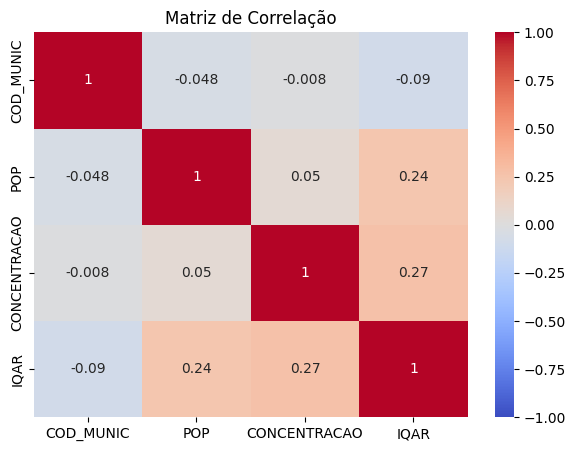

In [85]:
numeric_columns_no2_pop = qualidade_municipio_pop_no2.select_dtypes(include='number')
corr_matrix = numeric_columns_no2_pop.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

Essa matriz de correlação pode ser interpretada da seguinte forma: Quanto mais próximo de 1, um valor aumenta muito à medida que o outro também, e quanto mais perto de -1, um valor diminui à medida que o outro aumenta. À partir dessa matriz de correlação, podemos tirar algumas conclusões interessantes:

- Os dois fatores mais intimamente relacionados são o IQAR(Índice de qualidade do ar) e a população, com uma relação de 0.27. Quanto maior o IQAR, pior a qualidade do ar. Isso significa, portanto que quanto maior a população de uma cidade pior a qualidade do seu ar, e essas duas métricas estão intimamente relacionadas.

- Além disso, podemos ver que a concetração de NO2 no ar possui uma relação de 0.05 conforme há aumento populacional. Isso pode parecer marginal, mas de forma alguma é, 0.05 é uma relação considerável, e mostra que nas grandes cidades a concentração de dióxido de nitrogênio tende a ser maior.

- Interessantemente, o índice de qualidade do ar está negativamente relacionado com o CÓDIGO DE MUNICÍPIO, com uma relação de -0.09, bastante considerável. Isso pode, à primeira vista parecer absurdo, mas como você pode observar no dicionário que mapeia o estado ao seu respectivo código, estados próximos tendem a ter números próximos, e estados mais ao norte tendem a ter códigos menores(todos os estados de norte e nordeste tem códigos que começam com 1 ou 2, já os estados do sudeste, centro-oeste e sul tem códigos que começam com 3, 5 e 4 respectivamente). O código do município sempre começa com o código do seu estado. O que isso indica é que os municípios de estados do norte, e possivelmente os municípios de estados do nordeste, possuem, em média, uma maior qualidade do ar.